# Configurações e leitura dos dados

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import csv

pd.set_option('display.max_columns', None)

In [2]:
#https://github.com/dobraga/data_science_toolkit
from dstools.analysis import corr
from dstools.preprocess import TransformBinary, TransformOthers, OrdinalEncoder

Primeiramente serão descartadas as colunas duplicadas, com pouca variação e até colunas que não serão utilizada.

In [3]:
with open('../input/listings.csv') as f:
    columns = f.readline()

In [4]:
not_use = ('listing_url','scrape_id','last_scraped','thumbnail_url','medium_url', 'space', 'summary', 'interaction',
           'host_url','host_name','host_thumbnail_url','host_picture_url', 'market', 'name', 'neighborhood_overview',
           'picture_url', 'xl_picture_url', 'city', 'state' , 'zipcode', 'host_location', 'neighbourhood', 'house_rules',
           'market', 'smart_location', 'country_code' ,'country', 'street', 'host_location', 'access')

cols_use = [col.replace('\n', '') for col in columns.split(',') if col not in not_use]

In [5]:
df = pd.read_csv(
    '../input/listings.csv', 
    low_memory=False,
    index_col=['id', 'host_id'],
    usecols=cols_use,
    parse_dates=["host_since", "first_review", "last_review"],
    na_values = ['none']
)

In [6]:
df.head(5)

,,description,experiences_offered,notes,transit,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,host_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17878,68997,Pls note that special rates apply for Carnival...,NaN,NaN,Excellent location. Close to all major public ...,2010-01-08,I am a journalist/writer. Lived for 15 years...,within an hour,100%,NaN,t,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Copacabana,NaN,-22.96592,-43.17896,t,Condominium,Entire home/apt,5,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$332.00,NaN,NaN,$0.00,$378.00,2,$63.00,4,30,4,4,30,30,4.0,30.0,a week ago,t,23,31,35,303,2019-11-22,243,27,2010-07-15,2019-11-11,93.0,9.0,10.0,10.0,10.0,10.0,9.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.13
25026,102840,"Our apartment is a little gem, everyone loves ...",NaN,"For any stay superior to 15 days, an additiona...",At night we recommend you to take taxis only. ...,2010-04-03,"Hi guys, We're a lovely team of 3 people:\r\n\...",within a day,91%,NaN,f,Copacabana,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,Copacabana,NaN,-22.97712,-43.19045,t,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$160.00,NaN,NaN,"$1,000.00",$250.00,2,$45.00,7,60,7,7,60,60,7.0,60.0,5 weeks ago,t,16,22,35,119,2019-11-22,235,17,2010-06-07,2019-10-08,94.0,9.0,10.0,9.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,3,3,0,0,2.04
31560,135635,This nice and clean 1 bedroom apartment is loc...,NaN,NaN,"Bus, U-Bahn, Taxi und Leihfahrräder in der Nähe.",2010-05-31,I was born and raised in Rio de (Website hidde...,within an hour,100%,NaN,t,Ipanema,1.0,1.0,"['email', 'phone', 'manual_online', 'facebook'...",t,t,Ipanema,NaN,-22.98302,-43.21427,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$273.00,NaN,NaN,$0.00,$84.00,2,$42.00,2,1125,2,5,1125,1125,2.1,1125.0,today,t,2,5,9,88,2019-11-22,271,42,2010-07-11,2019-11-21,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.38
35636,153232,This cosy apartment is just a few steps away ...,NaN,Please include the following information with ...,Metro stop just 5 blocks from our place. Buses...,2010-06-27,"I am Brazilian and Carioca graphic designer, b...",within an hour,100%,NaN,t,Ipanema,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,Ipanema,NaN,-22.98816,-43.19359,t,Apartment,Entire home/apt,3,1.5,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$378.00,NaN,"$9,656.00","$1,050.

In [7]:
drop_columns = []

# Exploratória e Transformações

## Variável Resposta

In [8]:
df.price

id        host_id  
17878     68997        $332.00
25026     102840       $160.00
31560     135635       $273.00
35636     153232       $378.00
35764     153691       $130.00
                        ...   
40289331  120817094    $500.00
40289841  12983046     $202.00
40290087  134280245    $151.00
40290464  293527843    $252.00
40290908  64230796     $269.00
Name: price, Length: 33715, dtype: object

### Ajuste da variável

In [9]:
def to_numeric(value):
    return None if value is np.nan else float(value.replace('$', '').replace(',', ''))

In [10]:
df['price'] = df.price.apply(to_numeric)

### Valores extremos

In [11]:
df.price.describe()

count    33715.000000
mean       651.860537
std       1695.447098
min          0.000000
25%        151.000000
50%        290.000000
75%        600.000000
max      41982.000000
Name: price, dtype: float64

In [12]:
df[df.price == 0].size

532

Existem 602 valores zerados.

In [13]:
df[df.price == 0].head(3)

,,description,experiences_offered,notes,transit,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,host_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20269038,100693784,"apt,com microondas,liquidificador,cafeteira,sa...",NaN,NaN,NaN,2016-10-21,NaN,within an hour,83%,NaN,f,Copacabana,5.0,5.0,"['email', 'phone', 'reviews']",t,f,Jacarepaguá,NaN,-22.97320,-43.41019,t,Apartment,Entire home/apt,4,1.0,2.0,4.0,Real Bed,"{TV,Kitchen,""Free parking on premises"",Hangers...",NaN,0.0,NaN,NaN,NaN,NaN,1,$0.00,3,1125,3,3,1125,1125,3.0,1125.0,2 months ago,t,27,57,87,362,2019-11-22,4,3,2018-11-12,2019-05-12,80.0,8.0,8.0,10.0,10.0,10.0,9.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,4,4,0,0,0.32
21144730,107465765,The house is very comfortable and has lots of ...,NaN,NaN,"By foot, metro, buses or by bike",2016-12-16,"Amo viaggiare, ospitare le persone nelle mie b...",within a few hours,90%,NaN,f,Copacabana,17.0,17.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,f,Copacabana,NaN,-22.96854,-43.18862,t,Bed and breakfast,Hotel room,2,1.0,1.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,Elevator,""...",NaN,0.0,NaN,NaN,$0.00,$0.00,1,$75.00,3,1125,3,5,1125,1125,3.1,1125.0,2 weeks ago,t,22,27,27,296,2019-11-22,1,0,2018-09-11,2018-09-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,4,1,0,0,0.07
21174310,107465765,The house is very comfortable and has lots of ...,NaN,NaN,The neighborhood is definitely the most real a...,2016-12-16,"Amo viaggiare, ospitare le persone nelle mie b...",within a few hours,90%,NaN,f,Copacabana,17.0,17.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,f,Copacabana,NaN,-22.96869,-43.18838,t,Bed and breakfast,Hotel room,2,1.0,1.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...",NaN,0.0,NaN,NaN,$0.00,$0.00,1,$75.00,3,1125,3,5,1125,1125,3.0,1125.0,2 weeks ago,t,14,41,71,342,2019-11-22,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,4,1,0,0,NaN


Como esperado, acessando os links, não foi encontrado nenhum aluguel zerado, serão considerados como erro e serão eliminados.

In [14]:
df = df[df.price != 0]

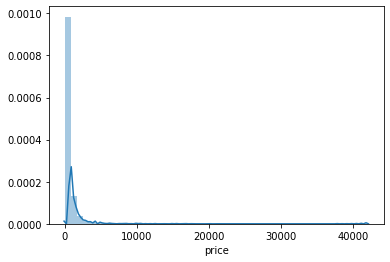

In [15]:
sns.distplot(df.price)

Existem poucos valores altissimos, analisaremos alguns casos.

In [16]:
df.sort_values('price', ascending = False).head(5)

,,description,experiences_offered,notes,transit,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,host_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13278620,74838468,Meu espaço é 5 MINUTOS DO PARQUE OLÍMPICO E CE...,NaN,NaN,NaN,2016-05-30,"Casa condominio Malibu, segurança máxima,Barra...",NaN,NaN,NaN,f,Barra da Tijuca,1.0,1.0,"['email', 'phone', 'facebook']",t,f,Barra da Tijuca,NaN,-23.00442,-43.39638,t,Apartment,Entire home/apt,16,7.0,8.0,14.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...",NaN,41982.0,NaN,NaN,"$21,411.00","$11,755.00",1,$0.00,16,90,16,16,90,90,16.0,90.0,39 months ago,t,23,53,83,83,2019-11-22,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,t,f,flexible,f,f,1,1,0,0,NaN
11909226,63368759,apartamento de fundos com varandão vista para ...,NaN,NaN,NaN,2016-03-17,NaN,NaN,NaN,NaN,f,Copacabana,1.0,1.0,"['email', 'phone']",t,f,Copacabana,NaN,-22.96740,-43.19354,t,Apartment,Entire home/apt,4,3.0,2.0,4.0,Real Bed,"{""Cable TV"",Wifi,""Air conditioning"",Kitchen,""F...",NaN,41982.0,NaN,NaN,NaN,NaN,1,$0.00,1,1125,1,1,1125,1125,1.0,1125.0,45 months ago,t,30,60,90,365,2019-11-22,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,1,1,0,0,NaN
12103702,64890978,RENT FOR THE MONTH GAMES OLYMPIC HOUSE IN COND...,NaN,NaN,NaN,2016-03-29,NaN,NaN,NaN,NaN,f,NaN,1.0,1.0,"['email', 'phone']",t,f,Barra da Tijuca,NaN,-23.00665,-43.34340,f,House,Entire home/apt,1,8.0,5.0,5.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,41982.0,NaN,NaN,"$21,411.00",NaN,1,$0.00,30,30,30,30,30,30,30.0,30.0,44 months ago,t,30,60,90,365,2019-11-22,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,1,1,0,0,NaN
14106421,84942794,"Viva com luxo, conforto e segurança nas Olimpí...",NaN,NaN,NaN,2016-07-20,NaN,NaN,NaN,NaN,f,NaN,1.0,1.0,"['email', 'phone']",t,f,Itanhangá,NaN,-22.98806,-43.30390,f,House,Entire home/apt,14,8.0,6.0,12.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...",NaN,41982.0,NaN,NaN,"$20,991.00",NaN,1,$0.00,7,1125,7,7,1125,1125,7.0,1125.0,41 months ago,t,0,0,0,0,2019-11-22,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,1,1,0,0,NaN
6571778,13372759,Cobertura em laranjeiras com Piscina e Churras...,NaN,NaN,"Ônibus, metro e Táxi próximos. 2 vagas de garagem",2014-03-21,NaN,within a day,100%,NaN,f,NaN,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,Laranjeiras,NaN,-22.93635,-43.18820,f,Apartment,Entire home/apt,7,3.5,3.0,5.0,Real Bed,"{""Cable TV"",Internet,Wifi,""Air conditioning"",P...",NaN,41982.0,NaN,"$125,946.00",NaN,NaN,1,$0.00,30,30,30,30,30,30,30.0,30.0,13 months ago,t,0,0,0,0,2019-11-22,0,0,N

Abrindo o link de alguns desses, parecem serem erros de inputação(não sei como e nem quem define o preço da diária), provavelmente são outliers.

Como por exemplo o https://www.airbnb.com.br/contact_host/11909226, mandei uma mensagem para validar esse valor.

In [17]:
df.groupby('number_of_reviews').agg(
    {
        'price': ['min','max','mean', 'count'],
    }
)

price                             
                     min      max         mean  count
number_of_reviews                                    
0                   29.0  41982.0  1025.765845  14563
1                   17.0  35500.0   478.885422   4294
2                   34.0  20000.0   432.799589   2435
3                   38.0  31398.0   396.056304   1634
4                   38.0   6507.0   341.263203   1155
...                  ...      ...          ...    ...
338                378.0    378.0   378.000000      1
347                332.0    332.0   332.000000      1
361                101.0    101.0   101.000000      1
366                202.0    202.0   202.000000      1
372                 71.0    315.0   193.000000      2

[250 rows x 4 columns]

In [18]:
df.number_of_reviews.value_counts(normalize=True)

0      0.432034
1      0.127388
2      0.072238
3      0.048475
4      0.034265
         ...   
199    0.000030
294    0.000030
189    0.000030
229    0.000030
287    0.000030
Name: number_of_reviews, Length: 250, dtype: float64

As estadias sem review possuem uma média consideravelmente maior, focaremos a nossa análise nas estadias com pelo menos um review pois certamente já foram alugadas.

In [19]:
df = df[df.number_of_reviews > 0]

#### Análise da distribuição

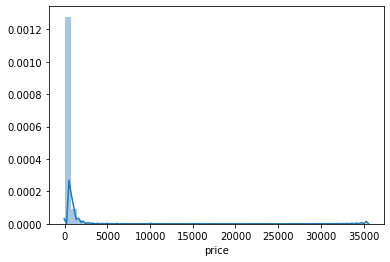

In [20]:
sns.distplot(df.price)

Mesmo removendo os alugueis sem review a distribuição da variável resposta é assimétrica(poucos valores muito altos), será utilizado a transformação logaritimica para minimizar esse efeito.

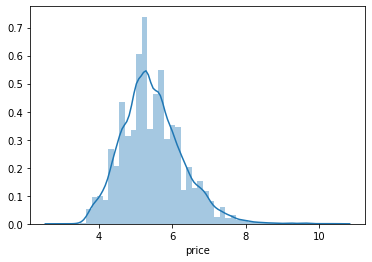

In [21]:
sns.distplot(np.log1p(df.price))

Agora a variável resposta possui distribuição mais atrativa para a análise de dados

In [22]:
df.price = np.log1p(df.price)

## Variáveis null

In [23]:
prop_nan = df.isna().mean().sort_values(ascending = False).head(25)
prop_nan

host_acceptance_rate            1.000000
experiences_offered             1.000000
neighbourhood_group_cleansed    1.000000
jurisdiction_names              1.000000
license                         0.999896
square_feet                     0.978428
weekly_price                    0.916271
monthly_price                   0.903317
notes                           0.570384
host_about                      0.436563
transit                         0.332567
security_deposit                0.328284
host_neighbourhood              0.297571
cleaning_fee                    0.191382
host_response_time              0.181301
host_response_rate              0.181301
review_scores_checkin           0.045704
review_scores_accuracy          0.045652
review_scores_location          0.045547
review_scores_value             0.045495
review_scores_communication     0.045390
review_scores_cleanliness       0.045390
review_scores_rating            0.044711
description                     0.016715
bathrooms       

Existem variáveis 100% nulas, além destas, as variáveis com mais de 50% de valores nulos serão desconsideradas da análise.

In [24]:
df = df.drop(columns=list(prop_nan[prop_nan >= .5].index))

## Outras Variáveis de preço

In [25]:
price_features = ['security_deposit', 'cleaning_fee', 'extra_people']
for price_feat in price_features:
    df[price_feat] = df[price_feat].apply(to_numeric)

In [26]:
price_features_transf = []
for price_feat in price_features:
    var = 'log_'+price_feat
    price_features_transf.append(var)
    df[var] = df[price_feat].apply(np.log1p)

/home/dobraga/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dobraga/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


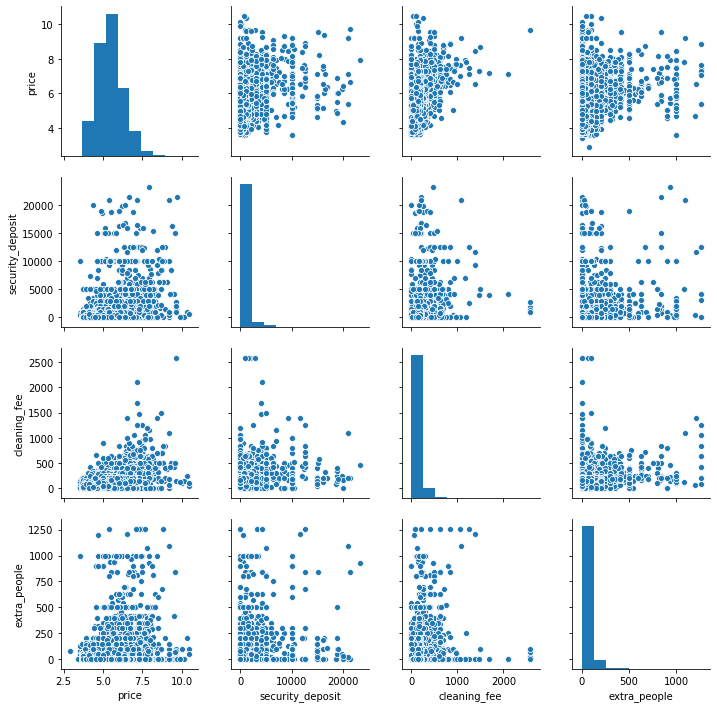

In [27]:
sns.pairplot(df[['price']+price_features])

As variáveis possuem um comportamento parecido com a variável resposta.

In [28]:
corr(df[['price']+price_features+price_features_transf])

,level_0,level_1,0
0,extra_people,log_extra_people,0.656746
1,cleaning_fee,log_cleaning_fee,0.636659
2,log_security_deposit,security_deposit,0.546005
3,cleaning_fee,price,0.498088
4,log_cleaning_fee,price,0.342281
5,price,security_deposit,0.326139
6,log_cleaning_fee,log_security_deposit,0.312783
7,log_security_deposit,price,0.303359
8,cleaning_fee,log_security_deposit,0.299931
9,cleaning_fee,security_deposit,0.299436


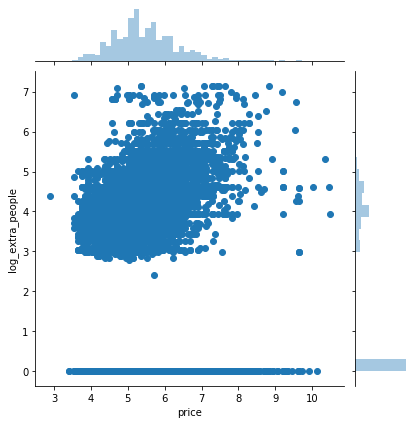

In [29]:
sns.jointplot("price", "log_extra_people", data=df)

## Flags

In [30]:
df.head(5)

,,description,transit,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_security_deposit,log_cleaning_fee,log_extra_people
id,host_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17878,68997,Pls note that special rates apply for Carnival...,Excellent location. Close to all major public ...,2010-01-08,I am a journalist/writer. Lived for 15 years...,within an hour,100%,t,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Copacabana,-22.96592,-43.17896,t,Condominium,Entire home/apt,5,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",5.808142,0.0,378.0,2,63.0,4,30,4,4,30,30,4.0,30.0,a week ago,t,23,31,35,303,2019-11-22,243,27,2010-07-15,2019-11-11,93.0,9.0,10.0,10.0,10.0,10.0,9.0,f,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.13,0.000000,5.937536,4.158883
25026,102840,"Our apartment is a little gem, everyone loves ...",At night we recommend you to take taxis only. ...,2010-04-03,"Hi guys, We're a lovely team of 3 people:\r\n\...",within a day,91%,f,Copacabana,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,Copacabana,-22.97712,-43.19045,t,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",5.081404,1000.0,250.0,2,45.0,7,60,7,7,60,60,7.0,60.0,5 weeks ago,t,16,22,35,119,2019-11-22,235,17,2010-06-07,2019-10-08,94.0,9.0,10.0,9.0,10.0,10.0,9.0,f,f,f,strict_14_with_grace_period,t,t,3,3,0,0,2.04,6.908755,5.525453,3.828641
31560,135635,This nice and clean 1 bedroom apartment is loc...,"Bus, U-Bahn, Taxi und Leihfahrräder in der Nähe.",2010-05-31,I was born and raised in Rio de (Website hidde...,within an hour,100%,t,Ipanema,1.0,1.0,"['email', 'phone', 'manual_online', 'facebook'...",t,t,Ipanema,-22.98302,-43.21427,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",5.613128,0.0,84.0,2,42.0,2,1125,2,5,1125,1125,2.1,1125.0,today,t,2,5,9,88,2019-11-22,271,42,2010-07-11,2019-11-21,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.38,0.000000,4.442651,3.761200
35636,153232,This cosy apartment is just a few steps away ...,Metro stop just 5 blocks from our place. Buses...,2010-06-27,"I am Brazilian and Carioca graphic designer, b...",within an hour,100%,t,Ipanema,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,Ipanema,-22.98816,-43.19359,t,Apartment,Entire home/apt,3,1.5,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",5.937536,1050.0,172.0,2,63.0,2,89,2,2,89,89,2.0,89.0,7 weeks ago,t,5,6,17,85,2019-11-22,169,35,2013-10-22,2019-11-13,94.0,10.0,9.0,10.0,10.0,10.0,9.0,f,f,f,strict_14_with_grace_period,t,t,1,1,0,0,2.28,6.957497,5.153292,4.158883
35764,153691,Our newly renovated studio is located in th

Essa classe avalia as variáveis que possuem baixa variabilidade para serem removidas(95% de valores iguais), e cria novas variáveis com uma proporção acima de 50%

In [31]:
tb = TransformBinary()
tb.fit(df)

In [32]:
tb.cols_drop

['host_has_profile_pic',
 'bed_type',
 'has_availability',
 'calendar_last_scraped',
 'requires_license',
 'is_business_travel_ready',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'calculated_host_listings_count_shared_rooms']

In [33]:
tb.cols_bin

['bin_host_response_rate_100%',
 'bin_host_is_superhost_f',
 'bin_host_identity_verified_f',
 'bin_is_location_exact_t',
 'bin_property_type_Apartment',
 'bin_room_type_Entire home/apt',
 'bin_bathrooms_1.0',
 'bin_bedrooms_1.0',
 'bin_guests_included_1',
 'bin_review_scores_accuracy_10.0',
 'bin_review_scores_cleanliness_10.0',
 'bin_review_scores_checkin_10.0',
 'bin_review_scores_communication_10.0',
 'bin_review_scores_location_10.0',
 'bin_review_scores_value_10.0',
 'bin_instant_bookable_f',
 'bin_calculated_host_listings_count_1',
 'bin_calculated_host_listings_count_private_rooms_0']

In [34]:
df.bed_type.value_counts(normalize=True) # Será removido pela baixa variabilidade

Real Bed         0.987360
Pull-out Sofa    0.008827
Futon            0.002350
Airbed           0.000940
Couch            0.000522
Name: bed_type, dtype: float64

In [35]:
df.guests_included.value_counts(normalize=True) # Será criado uma nova variável para o primeiro valor

1     0.606111
2     0.192478
4     0.090885
3     0.039018
6     0.031288
5     0.020789
8     0.007051
7     0.005014
10    0.003709
12    0.001149
9     0.000888
11    0.000679
15    0.000366
16    0.000313
13    0.000209
14    0.000052
Name: guests_included, dtype: float64

In [36]:
df = tb.transform(df) #Poderia ser utilizado o fit_transform, mas foi utilizado separadamente para melhor explicação
df.head(3)

,,description,transit,host_since,host_about,host_response_time,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,neighbourhood_cleansed,latitude,longitude,accommodates,beds,amenities,price,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,cancellation_policy,calculated_host_listings_count_entire_homes,reviews_per_month,log_security_deposit,log_cleaning_fee,log_extra_people,bin_host_response_rate_100%,bin_host_is_superhost_f,bin_host_identity_verified_f,bin_is_location_exact_t,bin_property_type_Apartment,bin_room_type_Entire home/apt,bin_bathrooms_1.0,bin_bedrooms_1.0,bin_guests_included_1,bin_review_scores_accuracy_10.0,bin_review_scores_cleanliness_10.0,bin_review_scores_checkin_10.0,bin_review_scores_communication_10.0,bin_review_scores_location_10.0,bin_review_scores_value_10.0,bin_instant_bookable_f,bin_calculated_host_listings_count_1,bin_calculated_host_listings_count_private_rooms_0
id,host_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17878,68997,Pls note that special rates apply for Carnival...,Excellent location. Close to all major public ...,2010-01-08,I am a journalist/writer. Lived for 15 years...,within an hour,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",Copacabana,-22.96592,-43.17896,5,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",5.808142,0.0,378.0,63.0,4,30,4,4,30,30,4.0,30.0,a week ago,23,31,35,303,243,27,2010-07-15,2019-11-11,93.0,strict_14_with_grace_period,1,2.13,0.000000,5.937536,4.158883,1,0,0,1,0,1,1,0,0,0,1,1,1,1,0,0,1,1
25026,102840,"Our apartment is a little gem, everyone loves ...",At night we recommend you to take taxis only. ...,2010-04-03,"Hi guys, We're a lovely team of 3 people:\r\n\...",within a day,Copacabana,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",Copacabana,-22.97712,-43.19045,2,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",5.081404,1000.0,250.0,45.0,7,60,7,7,60,60,7.0,60.0,5 weeks ago,16,22,35,119,235,17,2010-06-07,2019-10-08,94.0,strict_14_with_grace_period,3,2.04,6.908755,5.525453,3.828641,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,1,0,1
31560,135635,This nice and clean 1 bedroom apartment is loc...,"Bus, U-Bahn, Taxi und Leihfahrräder in der Nähe.",2010-05-31,I was born and raised in Rio de (Website hidde...,within an hour,Ipanema,1.0,1.0,"['email', 'phone', 'manual_online', 'facebook'...",Ipanema,-22.98302,-43.21427,3,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",5.613128,0.0,84.0,42.0,2,1125,2,5,1125,1125,2.1,1125.0,today,2,5,9,88,271,42,2010-07-11,2019-11-21,96.0,strict_14_with_grace_period,1,2.38,0.000000,4.442651,3.761200,1,0,0,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1


### Transformações e novas colunas

#### host_verifications

In [37]:
pd.Series(' '.join(df['host_verifications'].dropna().values).split()).value_counts().head(50)

['email',                   18026
'phone',                    15895
'reviews',                   9743
'jumio',                     9685
'government_id']             6610
'offline_government_id',     6291
'government_id',             4823
'facebook',                  4668
'reviews']                   4070
'selfie',                    4042
'identity_manual']           2982
'work_email']                2220
'phone']                     2078
'google',                    1195
['phone',                     691
'identity_manual',            670
'facebook']                   488
'manual_offline',             475
['phone']                     403
'google']                      85
'kba',                         74
'manual_online',               69
'manual_offline']              54
'kba']                         53
'selfie']                      50
'jumio']                       21
None                           10
['email']                      10
'sent_id']                      7
'sent_id',    

In [38]:
(df.host_verifications.str.contains('photographer')*1).value_counts(normalize= True)

0    0.999843
1    0.000157
Name: host_verifications, dtype: float64

In [39]:
for value in ['reviews', 'jumio', 'government_id', 'offline_government_id', 'facebook', 'selfie', 'identity_manual', 'work_email']:
    df['host_verifications_'+value] = df.host_verifications.str.contains(value)*1
    
df = df.drop(columns=['host_verifications'])

#### Texto aberto

In [40]:
df.head(3)

,,description,transit,host_since,host_about,host_response_time,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,accommodates,beds,amenities,price,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,cancellation_policy,calculated_host_listings_count_entire_homes,reviews_per_month,log_security_deposit,log_cleaning_fee,log_extra_people,bin_host_response_rate_100%,bin_host_is_superhost_f,bin_host_identity_verified_f,bin_is_location_exact_t,bin_property_type_Apartment,bin_room_type_Entire home/apt,bin_bathrooms_1.0,bin_bedrooms_1.0,bin_guests_included_1,bin_review_scores_accuracy_10.0,bin_review_scores_cleanliness_10.0,bin_review_scores_checkin_10.0,bin_review_scores_communication_10.0,bin_review_scores_location_10.0,bin_review_scores_value_10.0,bin_instant_bookable_f,bin_calculated_host_listings_count_1,bin_calculated_host_listings_count_private_rooms_0,host_verifications_reviews,host_verifications_jumio,host_verifications_government_id,host_verifications_offline_government_id,host_verifications_facebook,host_verifications_selfie,host_verifications_identity_manual,host_verifications_work_email
id,host_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17878,68997,Pls note that special rates apply for Carnival...,Excellent location. Close to all major public ...,2010-01-08,I am a journalist/writer. Lived for 15 years...,within an hour,Copacabana,2.0,2.0,Copacabana,-22.96592,-43.17896,5,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",5.808142,0.0,378.0,63.0,4,30,4,4,30,30,4.0,30.0,a week ago,23,31,35,303,243,27,2010-07-15,2019-11-11,93.0,strict_14_with_grace_period,1,2.13,0.000000,5.937536,4.158883,1,0,0,1,0,1,1,0,0,0,1,1,1,1,0,0,1,1,1,1,1,1,0,1,0,0
25026,102840,"Our apartment is a little gem, everyone loves ...",At night we recommend you to take taxis only. ...,2010-04-03,"Hi guys, We're a lovely team of 3 people:\r\n\...",within a day,Copacabana,3.0,3.0,Copacabana,-22.97712,-43.19045,2,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",5.081404,1000.0,250.0,45.0,7,60,7,7,60,60,7.0,60.0,5 weeks ago,16,22,35,119,235,17,2010-06-07,2019-10-08,94.0,strict_14_with_grace_period,3,2.04,6.908755,5.525453,3.828641,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,1,1,1,0,0,0
31560,135635,This nice and clean 1 bedroom apartment is loc...,"Bus, U-Bahn, Taxi und Leihfahrräder in der Nähe.",2010-05-31,I was born and raised in Rio de (Website hidde...,within an hour,Ipanema,1.0,1.0,Ipanema,-22.98302,-43.21427,3,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",5.613128,0.0,84.0,42.0,2,1125,2,5,1125,1125,2.1,1125.0,today,2,5,9,88,271,42,2010-07-11,2019-11-21,96.0,strict_14_with_grace_period,1,2.38,0.000000,4.442651,3.761200,1,0,0,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0


In [41]:
for col in ['description', 'transit', 'host_about', 'amenities']:
    df[col] = df[col].str.lower()

Será utilizado a pacote nltk para remover stopwords

In [42]:
from nltk.corpus import stopwords
stop = stopwords.words('english') + stopwords.words('portuguese') + [',', '-', '.', 'rio', 'O' ,'1', '2', '3', '4', '5']

In [43]:
def count_words(values):
    words = pd.Series(' '.join(values.dropna().values).split()).value_counts()
    return words[[word for word in words.index if word not in stop]]

##### description

In [44]:
count_words(df['description']).head(30)

apartamento    11563
apartment       8607
praia           7892
copacabana      6591
cama            6106
quarto          5980
tv              5963
próximo         5839
cozinha         5260
room            5140
bem             5062
sala            5022
acesso          4826
bairro          4676
ar              4469
beach           4298
one             4140
metrô           4053
espaço          3997
located         3994
living          3916
fica            3836
close           3823
barra           3813
minutos         3758
24              3720
ipanema         3718
perto           3709
air             3567
vista           3301
dtype: int64

In [45]:
(df.description.str.contains('metro.',regex = True).fillna(0).astype(int)).value_counts(normalize= True)

0    0.748394
1    0.251606
Name: description, dtype: float64

In [46]:
for value in ['praia|beach', 'tv', 'shopping', 'restaurante', 'bar']:
    df['description_'+value] = df.description.str.contains(value, regex=True).fillna(0).astype(int)
    
df = df.drop(columns=['description'])

##### transit

In [47]:
count_words(df['transit']).head(30)

ônibus         4138
metrô          3343
bus            2813
estação        2692
metro          2502
minutos        2036
taxi           2026
station        1715
transporte     1626
ponto          1610
subway         1600
fica           1598
minutes        1526
acesso         1453
pontos         1414
próximo        1395
brt            1357
uber           1343
rua            1268
copacabana     1248
frente         1231
10             1065
min            1063
fácil          1061
apartamento    1054
aeroporto      1053
zona           1009
táxi           1006
km              956
barra           943
dtype: int64

In [48]:
(df.transit.str.contains('airport',regex = True).fillna(0).astype(int)).value_counts(normalize= True)

0    0.959781
1    0.040219
Name: transit, dtype: float64

In [49]:
for value in ['.nibus|bus', 'metr.|subway', 't.xi', 'brt', 'aeroporto|airport']:
    df['transit_'+value] = df.transit.str.contains(value, regex=True).fillna(0).astype(int)
    
df = df.drop(columns=['transit'])

##### host_about

In [50]:
count_words(df['host_about']).head(30)

gosto          2606
love           2155
adoro          2043
pessoas        1999
conhecer       1947
bem            1842
janeiro        1769
cidade         1746
receber        1598
viajar         1379
i'm            1371
sempre         1328
janeiro.       1186
fazer          1159
like           1138
people         1120
janeiro,       1103
new            1087
apartamento    1060
anos           1025
airbnb         1007
casa            938
moro            913
estadia         911
hóspedes        895
trabalho        880
live            877
carioca         869
melhor          856
amo             851
dtype: int64

In [51]:
(df.host_about.str.contains('receb',regex = True).fillna(0).astype(int)).value_counts(normalize= True)

0    0.893758
1    0.106242
Name: host_about, dtype: float64

In [52]:
for value in ['receb', 'conhe']:
    df['host_about_'+value] = df.host_about.str.contains(value, regex=True).fillna(0).astype(int)
    
df = df.drop(columns=['host_about'])

##### amenities

In [53]:
count_words(df['amenities']).head(30)

friendly                            12039
parking                             11028
{tv,"cable                           8303
steps                                7942
stairs                               7942
bedroom                              6448
dryer",iron,"laptop                  6345
water","bed                          6344
silverware","cooking                 5995
stays                                5970
term                                 5970
greets                               5695
missing:                             4715
maker",refrigerator,"dishes          4709
dropoff                              4681
pillows                              4668
{tv,wifi,"air                        4645
linens","extra                       4567
path                                 4356
you"}                                4238
intercom","family/kid                4096
tv",wifi,"air                        3997
tv",internet,wifi,"air               3959
enter","wide                      

In [54]:
(df.amenities.str.contains('internet',regex = True).fillna(0).astype(int)).value_counts(normalize= True)

0    0.677514
1    0.322486
Name: amenities, dtype: float64

In [55]:
for value in ['friendly', 'parking', 'tv', 'laptop', 'pillows', 'pool']:
    df['amenities_'+value] = df.amenities.str.contains(value, regex=True).fillna(0).astype(int)
    
df = df.drop(columns=['amenities'])

In [56]:
df.head(3)

,,host_since,host_response_time,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,accommodates,beds,price,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,cancellation_policy,calculated_host_listings_count_entire_homes,reviews_per_month,log_security_deposit,log_cleaning_fee,log_extra_people,bin_host_response_rate_100%,bin_host_is_superhost_f,bin_host_identity_verified_f,bin_is_location_exact_t,bin_property_type_Apartment,bin_room_type_Entire home/apt,bin_bathrooms_1.0,bin_bedrooms_1.0,bin_guests_included_1,bin_review_scores_accuracy_10.0,bin_review_scores_cleanliness_10.0,bin_review_scores_checkin_10.0,bin_review_scores_communication_10.0,bin_review_scores_location_10.0,bin_review_scores_value_10.0,bin_instant_bookable_f,bin_calculated_host_listings_count_1,bin_calculated_host_listings_count_private_rooms_0,host_verifications_reviews,host_verifications_jumio,host_verifications_government_id,host_verifications_offline_government_id,host_verifications_facebook,host_verifications_selfie,host_verifications_identity_manual,host_verifications_work_email,description_praia|beach,description_tv,description_shopping,description_restaurante,description_bar,transit_.nibus|bus,transit_metr.|subway,transit_t.xi,transit_brt,transit_aeroporto|airport,host_about_receb,host_about_conhe,amenities_friendly,amenities_parking,amenities_tv,amenities_laptop,amenities_pillows,amenities_pool
id,host_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17878,68997,2010-01-08,within an hour,Copacabana,2.0,2.0,Copacabana,-22.96592,-43.17896,5,2.0,5.808142,0.0,378.0,63.0,4,30,4,4,30,30,4.0,30.0,a week ago,23,31,35,303,243,27,2010-07-15,2019-11-11,93.0,strict_14_with_grace_period,1,2.13,0.000000,5.937536,4.158883,1,0,0,1,0,1,1,0,0,0,1,1,1,1,0,0,1,1,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0
25026,102840,2010-04-03,within a day,Copacabana,3.0,3.0,Copacabana,-22.97712,-43.19045,2,2.0,5.081404,1000.0,250.0,45.0,7,60,7,7,60,60,7.0,60.0,5 weeks ago,16,22,35,119,235,17,2010-06-07,2019-10-08,94.0,strict_14_with_grace_period,3,2.04,6.908755,5.525453,3.828641,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,0,1,1,0,0
31560,135635,2010-05-31,within an hour,Ipanema,1.0,1.0,Ipanema,-22.98302,-43.21427,3,2.0,5.613128,0.0,84.0,42.0,2,1125,2,5,1125,1125,2.1,1125.0,today,2,5,9,88,271,42,2010-07-11,2019-11-21,96.0,strict_14_with_grace_period,1,2.38,0.000000,4.442651,3.761200,1,0,0,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0


## Colunas ordinais

In [57]:
df.host_neighbourhood.value_counts()

Copacabana           4624
Ipanema              1619
Barra da Tijuca      1464
Leblon                740
Botafogo              734
                     ... 
Almagro                 1
Praia de Iracema        1
Montparnasse            1
Sion                    1
II Arrondissement       1
Name: host_neighbourhood, Length: 136, dtype: int64

In [58]:
df.cancellation_policy.value_counts()

strict_14_with_grace_period    9197
flexible                       5508
moderate                       4073
super_strict_60                 255
super_strict_30                 110
strict                            2
Name: cancellation_policy, dtype: int64

In [59]:
df.host_response_time.value_counts(dropna=False)

within an hour        7035
within a few hours    4533
NaN                   3471
within a day          3323
a few days or more     783
Name: host_response_time, dtype: int64

In [60]:
df.calendar_updated.value_counts(dropna=False).sort_index()

1 week ago        201
10 months ago     323
11 months ago     257
12 months ago     192
13 months ago      85
                 ... 
9 months ago      340
a week ago       1310
never              33
today            1668
yesterday         822
Name: calendar_updated, Length: 83, dtype: int64

In [61]:
def group_calendar(value):
    if 'day' in value:
        return 'days'
    if 'week' in value:
        return 'weeks'
    elif 'month' in value:
        return 'months'
    else:
        return value

In [62]:
df['calendar_updated'] = df.calendar_updated.apply(group_calendar)
df.calendar_updated.value_counts(dropna=False)

months    7692
weeks     6848
days      4572
never       33
Name: calendar_updated, dtype: int64

In [63]:
ordinal = {
    'host_response_time': ['within an hour', 'within a few hours', 'within a day', 'a few days or more', 'NAN'],
    'cancellation_policy': ['flexible', 'moderate', 'strict_14_with_grace_period', 'strict', 'super_strict_30', 'super_strict_60'], #https://www.airbnb.com.br/home/cancellation_policies
    'calendar_updated': ['days', 'weeks', 'months', 'never']
}

In [64]:
oe = OrdinalEncoder(ordinal)

In [65]:
df = oe.transform(df)
df

,,host_since,host_response_time,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,accommodates,beds,price,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,cancellation_policy,calculated_host_listings_count_entire_homes,reviews_per_month,log_security_deposit,log_cleaning_fee,log_extra_people,bin_host_response_rate_100%,bin_host_is_superhost_f,bin_host_identity_verified_f,bin_is_location_exact_t,bin_property_type_Apartment,bin_room_type_Entire home/apt,bin_bathrooms_1.0,bin_bedrooms_1.0,bin_guests_included_1,bin_review_scores_accuracy_10.0,bin_review_scores_cleanliness_10.0,bin_review_scores_checkin_10.0,bin_review_scores_communication_10.0,bin_review_scores_location_10.0,bin_review_scores_value_10.0,bin_instant_bookable_f,bin_calculated_host_listings_count_1,bin_calculated_host_listings_count_private_rooms_0,host_verifications_reviews,host_verifications_jumio,host_verifications_government_id,host_verifications_offline_government_id,host_verifications_facebook,host_verifications_selfie,host_verifications_identity_manual,host_verifications_work_email,description_praia|beach,description_tv,description_shopping,description_restaurante,description_bar,transit_.nibus|bus,transit_metr.|subway,transit_t.xi,transit_brt,transit_aeroporto|airport,host_about_receb,host_about_conhe,amenities_friendly,amenities_parking,amenities_tv,amenities_laptop,amenities_pillows,amenities_pool
id,host_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17878,68997,2010-01-08,0,Copacabana,2.0,2.0,Copacabana,-22.96592,-43.17896,5,2.0,5.808142,0.0,378.0,63.0,4,30,4,4,30,30,4.0,30.0,1,23,31,35,303,243,27,2010-07-15,2019-11-11,93.0,2,1,2.13,0.000000,5.937536,4.158883,1,0,0,1,0,1,1,0,0,0,1,1,1,1,0,0,1,1,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0
25026,102840,2010-04-03,2,Copacabana,3.0,3.0,Copacabana,-22.97712,-43.19045,2,2.0,5.081404,1000.0,250.0,45.0,7,60,7,7,60,60,7.0,60.0,1,16,22,35,119,235,17,2010-06-07,2019-10-08,94.0,2,3,2.04,6.908755,5.525453,3.828641,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,0,1,1,0,0
31560,135635,2010-05-31,0,Ipanema,1.0,1.0,Ipanema,-22.98302,-43.21427,3,2.0,5.613128,0.0,84.0,42.0,2,1125,2,5,1125,1125,2.1,1125.0,0,2,5,9,88,271,42,2010-07-11,2019-11-21,96.0,2,1,2.38,0.000000,4.442651,3.761200,1,0,0,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0
35636,153232,2010-06-27,0,Ipanema,1.0,1.0,Ipanema,-22.98816,-43.19359,3,2.0,5.937536,1050.0,172.0,63.0,2,89,2,2,89,89,2.0,89.0,1,5,6,17,85,169,35,2013-10-22,2019-11-13,94.0,2,1,2.28,6.957497,5.153292,4.158883,1,0,0,1,1,1,0,1,0,1,0,1,1,1,0,1,1,1,1,1,1,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,1,1,1,0,0,0
35764,153691,2010-06-27,0,Copacabana,1.0,1.0,Copacabana,-22.98127,-43.19046,2,1.0,4.875197,400.0,140.0,80.0,3,28,3,3,28,28,3.0,28.0,0,4,6,12,128,316,40,2010-10-03,2019-11-16,98.0,2,1,2.84,5.993961,4.948760,4.394449,1,0,0,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40157438,204542289,2018-07-23,0,Ipanema,6.0,6.0,Barra da Tijuca,-23.00861,-43.30187,4,1.0,6.109248,NaN,NaN,0.0,1,1125,1,1,1125,1125,1.0,1125.0,0,30,59,89,364,1,1,2019-11-17,2019-11-17,NaN,0,2,1.00,NaN,NaN,0.000000,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0

In [66]:
df.dtypes[df.dtypes == 'object']

host_neighbourhood        object
neighbourhood_cleansed    object
dtype: object

## Coluna de datas

In [67]:
df.host_since = (pd.to_datetime('18-01-2020') - df.host_since).dt.days
df.host_since

id        host_id  
17878     68997        3662.0
25026     102840       3577.0
31560     135635       3519.0
35636     153232       3492.0
35764     153691       3492.0
                        ...  
40157438  204542289     544.0
40237024  147141435     879.0
40251786  4397336      2592.0
40266786  48771261     1529.0
40290464  293527843     131.0
Name: host_since, Length: 19145, dtype: float64

In [68]:
df.first_review = (pd.to_datetime('18-01-2020') - df.first_review).dt.days
df.first_review

id        host_id  
17878     68997        3474
25026     102840       3512
31560     135635       3478
35636     153232       2279
35764     153691       3394
                       ... 
40157438  204542289      62
40237024  147141435      57
40251786  4397336        58
40266786  48771261       58
40290464  293527843      57
Name: first_review, Length: 19145, dtype: int64

In [69]:
df.last_review = (pd.to_datetime('18-01-2020') - df.last_review).dt.days
df.last_review

id        host_id  
17878     68997         68
25026     102840       102
31560     135635        58
35636     153232        66
35764     153691        63
                      ... 
40157438  204542289     62
40237024  147141435     57
40251786  4397336       58
40266786  48771261      58
40290464  293527843     57
Name: last_review, Length: 19145, dtype: int64

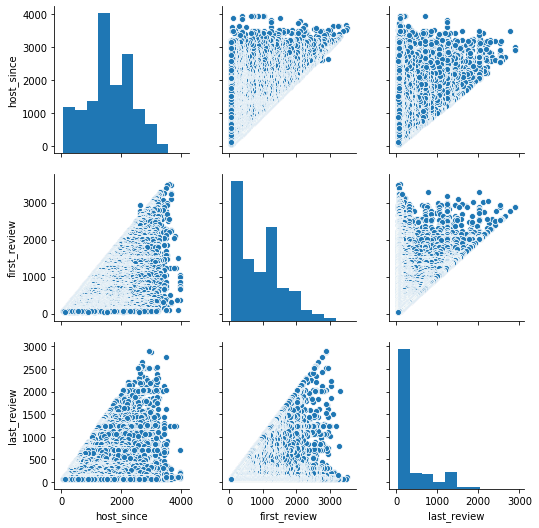

In [70]:
sns.pairplot(df[['host_since', 'first_review', 'last_review']])

## Colunas categóricas esparsas

In [71]:
df.head(3)

,,host_since,host_response_time,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,accommodates,beds,price,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,cancellation_policy,calculated_host_listings_count_entire_homes,reviews_per_month,log_security_deposit,log_cleaning_fee,log_extra_people,bin_host_response_rate_100%,bin_host_is_superhost_f,bin_host_identity_verified_f,bin_is_location_exact_t,bin_property_type_Apartment,bin_room_type_Entire home/apt,bin_bathrooms_1.0,bin_bedrooms_1.0,bin_guests_included_1,bin_review_scores_accuracy_10.0,bin_review_scores_cleanliness_10.0,bin_review_scores_checkin_10.0,bin_review_scores_communication_10.0,bin_review_scores_location_10.0,bin_review_scores_value_10.0,bin_instant_bookable_f,bin_calculated_host_listings_count_1,bin_calculated_host_listings_count_private_rooms_0,host_verifications_reviews,host_verifications_jumio,host_verifications_government_id,host_verifications_offline_government_id,host_verifications_facebook,host_verifications_selfie,host_verifications_identity_manual,host_verifications_work_email,description_praia|beach,description_tv,description_shopping,description_restaurante,description_bar,transit_.nibus|bus,transit_metr.|subway,transit_t.xi,transit_brt,transit_aeroporto|airport,host_about_receb,host_about_conhe,amenities_friendly,amenities_parking,amenities_tv,amenities_laptop,amenities_pillows,amenities_pool
id,host_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17878,68997,3662.0,0,Copacabana,2.0,2.0,Copacabana,-22.96592,-43.17896,5,2.0,5.808142,0.0,378.0,63.0,4,30,4,4,30,30,4.0,30.0,1,23,31,35,303,243,27,3474,68,93.0,2,1,2.13,0.000000,5.937536,4.158883,1,0,0,1,0,1,1,0,0,0,1,1,1,1,0,0,1,1,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0
25026,102840,3577.0,2,Copacabana,3.0,3.0,Copacabana,-22.97712,-43.19045,2,2.0,5.081404,1000.0,250.0,45.0,7,60,7,7,60,60,7.0,60.0,1,16,22,35,119,235,17,3512,102,94.0,2,3,2.04,6.908755,5.525453,3.828641,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,0,1,1,0,0
31560,135635,3519.0,0,Ipanema,1.0,1.0,Ipanema,-22.98302,-43.21427,3,2.0,5.613128,0.0,84.0,42.0,2,1125,2,5,1125,1125,2.1,1125.0,0,2,5,9,88,271,42,3478,58,96.0,2,1,2.38,0.000000,4.442651,3.761200,1,0,0,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0


In [72]:
df.host_neighbourhood.value_counts(dropna=False, normalize=True).head(50)

NaN                         0.297571
Copacabana                  0.241525
Ipanema                     0.084565
Barra da Tijuca             0.076469
Leblon                      0.038652
Botafogo                    0.038339
Flamengo                    0.026325
Recreio dos Bandeirantes    0.025020
Santa Teresa                0.024654
Lapa                        0.018699
Leme                        0.014260
Laranjeiras                 0.012170
Tijuca                      0.010917
Glória                      0.008148
Catete                      0.007208
Centro                      0.006634
Lagoa                       0.006007
Gávea                       0.005798
Humaitá                     0.005380
Jardim Botânico             0.004597
Vidigal                     0.004544
Vila Isabel                 0.003500
Maracanã                    0.003447
São Conrado                 0.003082
Urca                        0.002977
São Cristóvão               0.002298
Joá                         0.001985
C

In [73]:
df.neighbourhood_cleansed.value_counts(dropna=False, normalize=True).head(50)

Copacabana                  0.302586
Barra da Tijuca             0.107913
Ipanema                     0.104623
Jacarepaguá                 0.052651
Botafogo                    0.052599
Leblon                      0.052494
Recreio dos Bandeirantes    0.036720
Santa Teresa                0.034369
Centro                      0.028728
Flamengo                    0.028154
Leme                        0.017916
Laranjeiras                 0.016715
Tijuca                      0.014312
Glória                      0.011282
Catete                      0.010656
Lagoa                       0.009976
Gávea                       0.008880
Camorim                     0.008671
Jardim Botânico             0.007469
Humaitá                     0.006686
Maracanã                    0.005223
São Conrado                 0.004858
Vila Isabel                 0.004022
Vidigal                     0.003917
Urca                        0.003865
Freguesia (Jacarepaguá)     0.003761
Vargem Pequena              0.002873
T

Como são colunas esparsas, serão agrupadas os bairros com menores proporções

In [74]:
to = TransformOthers()

In [75]:
to.fit(df)

In [76]:
to.relevant_values

{'host_neighbourhood': ['Barra da Tijuca',
  'Botafogo',
  'Copacabana',
  'Flamengo',
  'Ipanema',
  'Lapa',
  'Laranjeiras',
  'Leblon',
  'Leme',
  'Recreio dos Bandeirantes',
  'Santa Teresa',
  'Tijuca'],
 'neighbourhood_cleansed': ['Barra da Tijuca',
  'Botafogo',
  'Catete',
  'Centro',
  'Copacabana',
  'Flamengo',
  'Glória',
  'Ipanema',
  'Jacarepaguá',
  'Laranjeiras',
  'Leblon',
  'Leme',
  'Recreio dos Bandeirantes',
  'Santa Teresa',
  'Tijuca']}

In [77]:
df = to.transform(df)
df

,,host_since,host_response_time,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,accommodates,beds,price,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,cancellation_policy,calculated_host_listings_count_entire_homes,reviews_per_month,log_security_deposit,log_cleaning_fee,log_extra_people,bin_host_response_rate_100%,bin_host_is_superhost_f,bin_host_identity_verified_f,bin_is_location_exact_t,bin_property_type_Apartment,bin_room_type_Entire home/apt,bin_bathrooms_1.0,bin_bedrooms_1.0,bin_guests_included_1,bin_review_scores_accuracy_10.0,bin_review_scores_cleanliness_10.0,bin_review_scores_checkin_10.0,bin_review_scores_communication_10.0,bin_review_scores_location_10.0,bin_review_scores_value_10.0,bin_instant_bookable_f,bin_calculated_host_listings_count_1,bin_calculated_host_listings_count_private_rooms_0,host_verifications_reviews,host_verifications_jumio,host_verifications_government_id,host_verifications_offline_government_id,host_verifications_facebook,host_verifications_selfie,host_verifications_identity_manual,host_verifications_work_email,description_praia|beach,description_tv,description_shopping,description_restaurante,description_bar,transit_.nibus|bus,transit_metr.|subway,transit_t.xi,transit_brt,transit_aeroporto|airport,host_about_receb,host_about_conhe,amenities_friendly,amenities_parking,amenities_tv,amenities_laptop,amenities_pillows,amenities_pool
id,host_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17878,68997,3662.0,0,Copacabana,2.0,2.0,Copacabana,-22.96592,-43.17896,5,2.0,5.808142,0.0,378.0,63.0,4,30,4,4,30,30,4.0,30.0,1,23,31,35,303,243,27,3474,68,93.0,2,1,2.13,0.000000,5.937536,4.158883,1,0,0,1,0,1,1,0,0,0,1,1,1,1,0,0,1,1,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0
25026,102840,3577.0,2,Copacabana,3.0,3.0,Copacabana,-22.97712,-43.19045,2,2.0,5.081404,1000.0,250.0,45.0,7,60,7,7,60,60,7.0,60.0,1,16,22,35,119,235,17,3512,102,94.0,2,3,2.04,6.908755,5.525453,3.828641,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,0,1,1,0,0
31560,135635,3519.0,0,Ipanema,1.0,1.0,Ipanema,-22.98302,-43.21427,3,2.0,5.613128,0.0,84.0,42.0,2,1125,2,5,1125,1125,2.1,1125.0,0,2,5,9,88,271,42,3478,58,96.0,2,1,2.38,0.000000,4.442651,3.761200,1,0,0,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0
35636,153232,3492.0,0,Ipanema,1.0,1.0,Ipanema,-22.98816,-43.19359,3,2.0,5.937536,1050.0,172.0,63.0,2,89,2,2,89,89,2.0,89.0,1,5,6,17,85,169,35,2279,66,94.0,2,1,2.28,6.957497,5.153292,4.158883,1,0,0,1,1,1,0,1,0,1,0,1,1,1,0,1,1,1,1,1,1,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,1,1,1,0,0,0
35764,153691,3492.0,0,Copacabana,1.0,1.0,Copacabana,-22.98127,-43.19046,2,1.0,4.875197,400.0,140.0,80.0,3,28,3,3,28,28,3.0,28.0,0,4,6,12,128,316,40,3394,63,98.0,2,1,2.84,5.993961,4.948760,4.394449,1,0,0,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40157438,204542289,544.0,0,Ipanema,6.0,6.0,Barra da Tijuca,-23.00861,-43.30187,4,1.0,6.109248,NaN,NaN,0.0,1,1125,1,1,1125,1125,1.0,1125.0,0,30,59,89,364,1,1,62,62,NaN,0,2,1.00,NaN,NaN,0.000000,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0
40237024,147141435,879.0,4,Others,1.0,1.0,Leblon,-22.98307,-43.22268,2,1.0,5.991465,0.0,100.0,0

In [78]:
df.dtypes.head(50)

host_since                                     float64
host_response_time                               int64
host_neighbourhood                              object
host_listings_count                            float64
host_total_listings_count                      float64
neighbourhood_cleansed                          object
latitude                                       float64
longitude                                      float64
accommodates                                     int64
beds                                           float64
price                                          float64
security_deposit                               float64
cleaning_fee                                   float64
extra_people                                   float64
minimum_nights                                   int64
maximum_nights                                   int64
minimum_minimum_nights                           int64
maximum_minimum_nights                           int64
minimum_ma

In [79]:
df = pd.get_dummies(df)
df

,,host_since,host_response_time,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,beds,price,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,cancellation_policy,calculated_host_listings_count_entire_homes,reviews_per_month,log_security_deposit,log_cleaning_fee,log_extra_people,bin_host_response_rate_100%,bin_host_is_superhost_f,bin_host_identity_verified_f,bin_is_location_exact_t,bin_property_type_Apartment,bin_room_type_Entire home/apt,bin_bathrooms_1.0,bin_bedrooms_1.0,bin_guests_included_1,bin_review_scores_accuracy_10.0,bin_review_scores_cleanliness_10.0,bin_review_scores_checkin_10.0,bin_review_scores_communication_10.0,bin_review_scores_location_10.0,bin_review_scores_value_10.0,bin_instant_bookable_f,bin_calculated_host_listings_count_1,bin_calculated_host_listings_count_private_rooms_0,host_verifications_reviews,host_verifications_jumio,host_verifications_government_id,host_verifications_offline_government_id,host_verifications_facebook,host_verifications_selfie,host_verifications_identity_manual,host_verifications_work_email,description_praia|beach,description_tv,description_shopping,description_restaurante,description_bar,transit_.nibus|bus,transit_metr.|subway,transit_t.xi,transit_brt,transit_aeroporto|airport,host_about_receb,host_about_conhe,amenities_friendly,amenities_parking,amenities_tv,amenities_laptop,amenities_pillows,amenities_pool,host_neighbourhood_Barra da Tijuca,host_neighbourhood_Botafogo,host_neighbourhood_Copacabana,host_neighbourhood_Flamengo,host_neighbourhood_Ipanema,host_neighbourhood_Lapa,host_neighbourhood_Laranjeiras,host_neighbourhood_Leblon,host_neighbourhood_Leme,host_neighbourhood_Others,host_neighbourhood_Recreio dos Bandeirantes,host_neighbourhood_Santa Teresa,host_neighbourhood_Tijuca,neighbourhood_cleansed_Barra da Tijuca,neighbourhood_cleansed_Botafogo,neighbourhood_cleansed_Catete,neighbourhood_cleansed_Centro,neighbourhood_cleansed_Copacabana,neighbourhood_cleansed_Flamengo,neighbourhood_cleansed_Glória,neighbourhood_cleansed_Ipanema,neighbourhood_cleansed_Jacarepaguá,neighbourhood_cleansed_Laranjeiras,neighbourhood_cleansed_Leblon,neighbourhood_cleansed_Leme,neighbourhood_cleansed_Others,neighbourhood_cleansed_Recreio dos Bandeirantes,neighbourhood_cleansed_Santa Teresa,neighbourhood_cleansed_Tijuca
id,host_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17878,68997,3662.0,0,2.0,2.0,-22.96592,-43.17896,5,2.0,5.808142,0.0,378.0,63.0,4,30,4,4,30,30,4.0,30.0,1,23,31,35,303,243,27,3474,68,93.0,2,1,2.13,0.000000,5.937536,4.158883,1,0,0,1,0,1,1,0,0,0,1,1,1,1,0,0,1,1,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
25026,102840,3577.0,2,3.0,3.0,-22.97712,-43.19045,2,2.0,5.081404,1000.0,250.0,45.0,7,60,7,7,60,60,7.0,60.0,1,16,22,35,119,235,17,3512,102,94.0,2,3,2.04,6.908755,5.525453,3.828641,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
31560,135635,3519.0,0,1.0,1.0,-22.98302,-43.21427,3,2.0,5.613128,0.0,84.0,42.0,2,1125,2,5,1125,1125,2.1,1125.0,0,2,5,9,88,271,42,3478,58,96.0,2,1,2.38,0.000000,4.442651,3.761200,1,0,0,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
35636,153232,3492.0,0,1.0,1.0,-22.98816,-43.19359,3,2.0,5.937536,1050.0,172.0,63.0,2,89,2,2,89,89,2.0,89.0,1,5,6,17,85,169,35,2279,66,94.0,2,1,2.28,6.957497,5.153292,4.158883,1,0,0,1,1,1,0,1,0,1,0,1,1,1,0,1,1,1,1,1,1,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0

## Latitude e Longitude

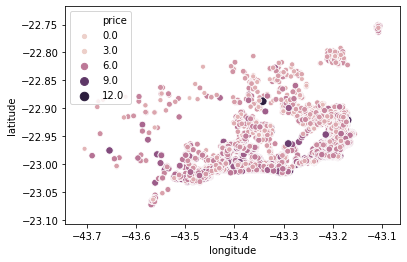

In [80]:
sns.scatterplot(x="longitude", y="latitude",
                hue="price", size="price",
                data=df)

In [81]:
corr(df[['latitude', 'longitude', 'price']])

,level_0,level_1,0
0,latitude,longitude,0.393273
1,latitude,price,-0.311700
2,longitude,price,-0.068353


A relação entre o preço e a latitude é negativa, como esperado, na baixas latitudes ficam a zona sul, barra da tijuca e recreio. A longitude também apresenta uma relação negativa, porém mais fraca.

## Multicolinearidade

In [82]:
corr(df).head(50)

,level_0,level_1,0
0,host_listings_count,host_total_listings_count,1.000000
1,maximum_maximum_nights,maximum_nights_avg_ntm,0.999840
2,maximum_nights_avg_ntm,minimum_maximum_nights,0.998715
3,maximum_maximum_nights,minimum_maximum_nights,0.998311
4,minimum_minimum_nights,minimum_nights_avg_ntm,0.993942
5,maximum_maximum_nights,maximum_nights,0.981023
6,maximum_nights,maximum_nights_avg_ntm,0.980853
7,maximum_nights,minimum_maximum_nights,0.979674
8,maximum_minimum_nights,minimum_nights_avg_ntm,0.975542
9,availability_60,availability_90,0.973433


# Modelos

In [83]:
from dstools.model import EvalModels
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, BaggingRegressor, AdaBoostRegressor

In [135]:
df = df.fillna(0)

In [136]:
eva = EvalModels(df, target='price')

In [137]:
eva.eval_models(
    {
        'lr': LinearRegression,
        'blr':BayesianRidge,
        'rfr':RandomForestRegressor,
        'br': BaggingRegressor,
        'abr':AdaBoostRegressor,
        'gbr':GradientBoostingRegressor
    }
)

Score for lr model 0.3058 (0.0199)
Score for blr model 0.3070 (0.0192)
Score for rfr model 0.2506 (0.0057)
Score for br model 0.2751 (0.0062)
Score for abr model 0.4988 (0.0238)
Score for gbr model 0.2490 (0.0074)
